In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [5]:
#preprocess the MNIST dataset transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


# load data from pytorch dataset and apply transform
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


# create dataloaders from data so it can be batched 
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6619808.08it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 433576.70it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3348354.07it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3051991.15it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



the label is 8


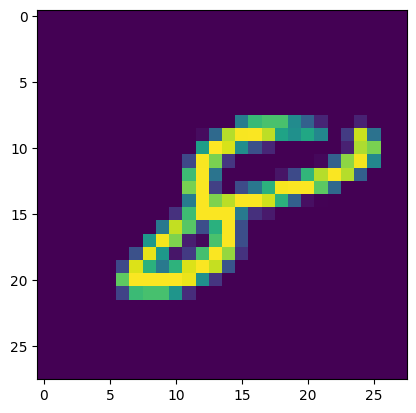

In [13]:
from matplotlib.pyplot import imshow

tensor, labels = next(iter(train_loader))

imshow(tensor[0].squeeze()), 
print(f"the label is {labels[0]}")

In [15]:

# Define the CNN architecture for 28*28 images
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

# Set device

In [ ]:
# device for gpu acceleration
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(device)

# Initialize the model, loss function, and optimizer
model = MNISTClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

mps


In [17]:
num_epochs = 10

# train loop
for epoch in range(num_epochs):
    # model mode
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        # data to device
        data, targets = data.to(device), targets.to(device)
        
        # get rid of prior grad
        optimizer.zero_grad()
        # forward pass
        outputs = model(data)
        # calc loos
        loss = criterion(outputs, targets)
        # back pass
        loss.backward()
        # update weights 
        optimizer.step()
        
    
        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
correct = 0
total = 0
# save compute with no grad and model.eval()
with torch.no_grad():
    for data, targets in test_loader:
        # data to device
        data, targets = data.to(device), targets.to(device)
        outputs = model(data)
        # take highest pred and add to score
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

Epoch [1/10], Step [1/938], Loss: 2.3080
Epoch [1/10], Step [101/938], Loss: 0.0540
Epoch [1/10], Step [201/938], Loss: 0.0208
Epoch [1/10], Step [301/938], Loss: 0.0546
Epoch [1/10], Step [401/938], Loss: 0.0332
Epoch [1/10], Step [501/938], Loss: 0.0600
Epoch [1/10], Step [601/938], Loss: 0.1139
Epoch [1/10], Step [701/938], Loss: 0.0161
Epoch [1/10], Step [801/938], Loss: 0.0570
Epoch [1/10], Step [901/938], Loss: 0.0161
Epoch [2/10], Step [1/938], Loss: 0.0073
Epoch [2/10], Step [101/938], Loss: 0.0791
Epoch [2/10], Step [201/938], Loss: 0.0059
Epoch [2/10], Step [301/938], Loss: 0.0264
Epoch [2/10], Step [401/938], Loss: 0.0158
Epoch [2/10], Step [501/938], Loss: 0.0278
Epoch [2/10], Step [601/938], Loss: 0.0397
Epoch [2/10], Step [701/938], Loss: 0.0795
Epoch [2/10], Step [801/938], Loss: 0.0689
Epoch [2/10], Step [901/938], Loss: 0.0197
Epoch [3/10], Step [1/938], Loss: 0.0258
Epoch [3/10], Step [101/938], Loss: 0.0417
Epoch [3/10], Step [201/938], Loss: 0.0241
Epoch [3/10], Ste

LABEL 3
prediction 3


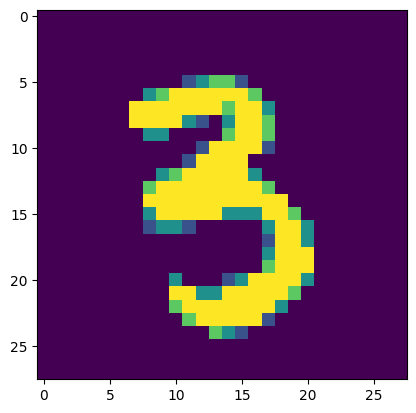

In [27]:
import numpy as np

# Validate data post model
data, labels = next(iter(test_loader))

len_data = data.shape[0]
len_data
index = np.random.randint(len_data)

print(f"LABEL {labels[index]}")
imshow(data[index].squeeze())

pred = torch.argmax(model(data[index].to(device)))

print(f"prediction {pred}")